In [1]:
import json
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

from utils import *

In [2]:
with open("ori_pqal.json") as f:
    data = json.load(f)

In [3]:
df = pd.DataFrame(data).T
df

,QUESTION,CONTEXTS,LABELS,MESHES,YEAR,reasoning_required_pred,reasoning_free_pred,final_decision,LONG_ANSWER
21645374,Do mitochondria play a role in remodelling lac...,[Programmed cell death (PCD) is the regulated ...,"[BACKGROUND, RESULTS]","[Alismataceae, Apoptosis, Cell Differentiation...",2011,yes,yes,yes,Results depicted mitochondrial dynamics in viv...
16418930,Landolt C and snellen e acuity: differences in...,[Assessment of visual acuity depends on the op...,"[BACKGROUND, PATIENTS AND METHODS, RESULTS]","[Adolescent, Adult, Aged, Aged, 80 and over, A...",2006,no,no,no,"Using the charts described, there was only a s..."
9488747,"Syncope during bathing in infants, a pediatric...",[Apparent life-threatening events in infants a...,"[BACKGROUND, CASE REPORTS]","[Baths, Histamine, Humans, Infant, Syncope, Ur...",1997,yes,yes,yes,"""Aquagenic maladies"" could be a pediatric form..."
17208539,Are the long-term results of the transanal pul...,[The transanal endorectal pull-through (TERPT)...,"[PURPOSE, METHODS, RESULTS]","[Child, Child, Preschool, Colectomy, Female, H...",2007,yes,no,no,Our long-term study showed significantly bette...
10808977,Can tailored interventions increase mammograph...,[Telephone counseling and tailored print commu...,"[BACKGROUND, DESIGN, PARTICIPANTS, INTERVENTIO...","[Cost-Benefit Analysis, Female, Health Mainten...",2000,yes,no,yes,The effects of the intervention were most pron...
...,...,...,...,...,...,...,...,...,...
8921484,Does gestational age misclassification explain...,"[After 34 weeks gestation, summary measures of...","[BACKGROUND, METHODS, RESULTS]","[Adult, Australia, Birth Weight, Classificatio...",1996,yes,no,no,Gestational age misclassification is an unlike...
16564683,Is there any interest to perform ultrasonograp...,[To evaluate the accuracy of ultrasonographic ...,"[OBJECTIVE, MATERIAL AND METHODS, RESULTS]","[Child, Child, Preschool, Cryptorchidism, Huma...",2006,no,no,no,Sonography has no place in the diagnosis of un...
23147106,Is peak concentration needed in therapeutic dr...,[We analyzed the pharmacokinetic-pharmacodynam...,"[BACKGROUND, METHODS, RESULTS]","[Aged, Aged, 80 and over, Anti-Bacterial Agent...",2012,yes,no,no,These results suggest little need to use peak ...
21550158,Can autologous platelet-rich plasma gel enhanc...,[This investigation assesses the effect of pla...,"[PURPOSE, PATIENTS AND METHODS, RESULTS]","[Adult, Bone Regeneration, Chi-Square Distribu...",2011,no,yes,yes,"The PRP group recorded reduced pain, swelling,..."


In [4]:
low = []

for l in df["LABELS"].tolist():
    low.extend(l)

cntr = Counter(low)

In [5]:
list(cntr.keys())

['BACKGROUND',
 'RESULTS',
 'PATIENTS AND METHODS',
 'CASE REPORTS',
 'PURPOSE',
 'METHODS',
 'DESIGN',
 'PARTICIPANTS',
 'INTERVENTION',
 'MAIN OUTCOME',
 'AIMS',
 'OBJECTIVE',
 'OBJECTIVES',
 'CONTEXT',
 'SUMMARY BACKGROUND DATA',
 'INTRODUCTION',
 'MATERIAL AND METHODS',
 'DISCUSSION',
 'MATERIALS AND METHODS',
 'SETTING',
 'PATIENTS',
 'MAIN OUTCOME MEASURES',
 'LIMITATIONS',
 'STUDY DESIGN',
 'DATA EXTRACTION',
 'PRINCIPAL FINDINGS',
 'BACKGROUND AND OBJECTIVES',
 'ICU LOS',
 'BACKGROUND AND PURPOSE',
 'METHOD',
 'MAIN OUTCOME MEASURE',
 'UNLABELLED',
 'PRIMARY OBJECTIVE',
 'RESEARCH DESIGN AND METHODS',
 'MAIN RESULTS',
 'MEASUREMENTS',
 'OBJECTIVE AND METHODS',
 'PURPOSE OF INVESTIGATION',
 'STUDY OBJECTIVE',
 'SETTINGS',
 'METHODS AND MATERIALS',
 'PATIENTS AND METHOD',
 'CASE PRESENTATION',
 'METHODS AND RESULTS',
 'RESULT',
 'MEASUREMENT AND RESULTS',
 'DESIGN, SETTING AND PATIENTS',
 'SUMMARY OF BACKGROUND DATA',
 'DATA SOURCES',
 'STUDY SELECTION',
 'DATA SYNTHESIS',
 'SUBJ

In [6]:
label2cluster = {}

for k, v in cluster2label.items():
    for l in v:
        label2cluster[l] = k

In [7]:
errors = set()

def proc(x):
    res = []
    for l in x:
        try:
            res.append(label2cluster[l])
        except:
            errors.add(l)
            res.append("error")
    return res

In [8]:
df["cluster"] = df["LABELS"].apply(lambda x: proc(x))

In [9]:
for i in errors:
    print(f'"{i}",')

df[df["cluster"].map(lambda x: "error" in x)]

,QUESTION,CONTEXTS,LABELS,MESHES,YEAR,reasoning_required_pred,reasoning_free_pred,final_decision,LONG_ANSWER,cluster


In [10]:
request_response

{'Input': ['QUESTION'],
 'Output': ['Objective',
  'Background Context',
  'Methodology',
  'Participants and Setting',
  'Data']}

In [11]:
def get_prompt(data_sample):
    instruction = "Given the following research question, please provide a methodology to conduct research on it which would enable the researcher to answer the question."

    user_input = f"""{instruction}

Research Question: {data_sample["QUESTION"]}

"""

#     for c, l, val in zip(data_sample["cluster"], data_sample["LABELS"], data_sample["CONTEXTS"]):
#         if c in request_response["Input"]:
#             user_input += f"""{c} | {l}: {val}
# """
        
    # print(user_input)


    prompt = f"""<|begin_of_text|><|start_header_id|>system<|end_header_id|>

You are a helpful research assistant<|eot_id|><|start_header_id|>user<|end_header_id|>

{user_input}<|eot_id|><|start_header_id|>assistant<|end_header_id|>

"""

    return prompt

In [12]:
data_sample = df.sample(1).iloc[0]
print(data_sample)

QUESTION                   Production of chemokines by perivascular adipo...
CONTEXTS                   [Obesity is associated with an increased risk ...
LABELS                                      [OBJECTIVE, METHODS AND RESULTS]
MESHES                     [Adipose Tissue, Animals, Aorta, Atheroscleros...
YEAR                                                                    2005
reasoning_required_pred                                                  yes
reasoning_free_pred                                                      yes
final_decision                                                           yes
LONG_ANSWER                Human pWAT has chemotactic properties through ...
cluster                                             [Objective, Methodology]
Name: 16195477, dtype: object


In [13]:
print(get_prompt(data_sample))

<|begin_of_text|><|start_header_id|>system<|end_header_id|>

You are a helpful research assistant<|eot_id|><|start_header_id|>user<|end_header_id|>

Given the following research question, please provide a methodology to conduct research on it which would enable the researcher to answer the question.

Research Question: Production of chemokines by perivascular adipose tissue: a role in the pathogenesis of atherosclerosis?

<|eot_id|><|start_header_id|>assistant<|end_header_id|>




In [14]:
assistant_output = ""
for c, l, val in zip(data_sample["cluster"], data_sample["LABELS"], data_sample["CONTEXTS"]):
    if c in request_response["Output"]:
        assistant_output += f"""{c}: {val}
""" #  <- {l}
print(assistant_output) 

Objective: Obesity is associated with an increased risk for cardiovascular disease. Although it is known that white adipose tissue (WAT) produces numerous proinflammatory and proatherogenic cytokines and chemokines, it is unclear whether adipose-derived chemotactic signals affect the chronic inflammation in atherosclerosis.
Methodology: Histological examination showed that perivascular WAT (pWAT) is in close proximity to vascular walls, particularly at sites that have a tendency to develop atherosclerosis. In rodents, the amount of pWAT is markedly increased by a high-fat diet. At a functional level, supernatant from subcutaneous and pWAT strongly induced the chemotaxis of peripheral blood leukocytes. The migration of granulocytes and monocytes was mostly mediated by interleukin-8 and monocyte chemoattractant protein-1, respectively, whereas both chemokines contributed to the migration of activated T cells. Moreover, pWAT produces these chemokines, as shown by immunohistochemistry and 

In [15]:
df["LABELS"].value_counts()

LABELS
[BACKGROUND, METHODS, RESULTS]                                       242
[OBJECTIVE, METHODS, RESULTS]                                         93
[PURPOSE, METHODS, RESULTS]                                           58
[OBJECTIVES, METHODS, RESULTS]                                        43
[METHODS, RESULTS]                                                    24
                                                                    ... 
[BACKGROUND, PATIENTS, METHODS]                                        1
[OBJECTIVE, BACKGROUND, METHOD, RESULTS]                               1
[OBJECTIVE, PATIENTS, DESIGN, MAIN OUTCOME MEASURES, RESULTS]          1
[OBJECTIVE, DESIGN, SETTING, PARTICIPANTS, MEASUREMENTS, RESULTS]      1
[BACKGROUND AND PURPOSE, PATIENTS AND METHODS, RESULTS]                1
Name: count, Length: 264, dtype: int64

In [16]:
df["cluster"].value_counts()

cluster
[Objective, Methodology, Results]                                                                 366
[Background Context, Methodology, Results]                                                        308
[Background Context, Objective, Methodology, Results]                                              52
[Methodology, Results]                                                                             38
[Objective, Participants and Setting, Results]                                                     25
                                                                                                 ... 
[Objective, Results, Participants and Setting, Participants and Setting, Methodology, Results]      1
[Methodology, Objective, Participants and Setting, Methodology, Results]                            1
[Objective, Participants and Setting, Participants and Setting, Methodology, Results, Results]      1
[Objective]                                                               

In [18]:
# df[df["cluster"].map(lambda x: x == ["Objective", "Results", "Participants | Setting", "Participants | Setting", "Methodology", "Results"])]["CONTEXTS"].iloc[0]

In [19]:
df

,QUESTION,CONTEXTS,LABELS,MESHES,YEAR,reasoning_required_pred,reasoning_free_pred,final_decision,LONG_ANSWER,cluster
21645374,Do mitochondria play a role in remodelling lac...,[Programmed cell death (PCD) is the regulated ...,"[BACKGROUND, RESULTS]","[Alismataceae, Apoptosis, Cell Differentiation...",2011,yes,yes,yes,Results depicted mitochondrial dynamics in viv...,"[Background Context, Results]"
16418930,Landolt C and snellen e acuity: differences in...,[Assessment of visual acuity depends on the op...,"[BACKGROUND, PATIENTS AND METHODS, RESULTS]","[Adolescent, Adult, Aged, Aged, 80 and over, A...",2006,no,no,no,"Using the charts described, there was only a s...","[Background Context, Participants and Setting,..."
9488747,"Syncope during bathing in infants, a pediatric...",[Apparent life-threatening events in infants a...,"[BACKGROUND, CASE REPORTS]","[Baths, Histamine, Humans, Infant, Syncope, Ur...",1997,yes,yes,yes,"""Aquagenic maladies"" could be a pediatric form...","[Background Context, Case Reports and Descript..."
17208539,Are the long-term results of the transanal pul...,[The transanal endorectal pull-through (TERPT)...,"[PURPOSE, METHODS, RESULTS]","[Child, Child, Preschool, Colectomy, Female, H...",2007,yes,no,no,Our long-term study showed significantly bette...,"[Objective, Methodology, Results]"
10808977,Can tailored interventions increase mammograph...,[Telephone counseling and tailored print commu...,"[BACKGROUND, DESIGN, PARTICIPANTS, INTERVENTIO...","[Cost-Benefit Analysis, Female, Health Mainten...",2000,yes,no,yes,The effects of the intervention were most pron...,"[Background Context, Methodology, Participants..."
...,...,...,...,...,...,...,...,...,...,...
8921484,Does gestational age misclassification explain...,"[After 34 weeks gestation, summary measures of...","[BACKGROUND, METHODS, RESULTS]","[Adult, Australia, Birth Weight, Classificatio...",1996,yes,no,no,Gestational age misclassification is an unlike...,"[Background Context, Methodology, Results]"
16564683,Is there any interest to perform ultrasonograp...,[To evaluate the accuracy of ultrasonographic ...,"[OBJECTIVE, MATERIAL AND METHODS, RESULTS]","[Child, Child, Preschool, Cryptorchidism, Huma...",2006,no,no,no,Sonography has no place in the diagnosis of un...,"[Objective, Methodology, Results]"
23147106,Is peak concentration needed in therapeutic dr...,[We analyzed the pharmacokinetic-pharmacodynam...,"[BACKGROUND, METHODS, RESULTS]","[Aged, Aged, 80 and over, Anti-Bacterial Agent...",2012,yes,no,no,These results suggest little need to use peak ...,"[Background Context, Methodology, Results]"
21550158,Can autologous platelet-rich plasma gel enhanc...,[This investigation assesses the effect of pla...,"[PURPOSE, PATIENTS AND METHODS, RESULTS]","[Adult, Bone Regeneration, Chi-Square Distribu...",2011,no,yes,yes,"The PRP group recorded reduced pain, swelling,...","[Objective, Participants and Setting, Results]"


In [111]:
lists = {
    "Objective": [""]*len(df),
    "Background Context": [""]*len(df),
    "Methodology": [""]*len(df),
    # "Participants and Setting": [""]*len(df),
    # "Data": [""]*len(df),
}
cols = ["Research Question"] + list(lists.keys())
i = 0
for idx, rw in df.iterrows():
    for cnt, clus in zip(rw["CONTEXTS"], rw["cluster"]):
        if clus in lists.keys():
            lists[clus][i] += " " + cnt

    i += 1
    
for k, v in lists.items():
    print(k, len(v))
new_df = pd.DataFrame(lists)
new_df["Research Question"] = df["QUESTION"].tolist()
new_df = new_df[cols]

new_df = new_df[new_df["Methodology"].apply(lambda x: len(x)) > 0]
new_df = new_df[(new_df["Objective"].map(len) > 0) | (new_df["Background Context"].map(len) > 0)]
new_df

Objective 1000
Background Context 1000
Methodology 1000


,Research Question,Objective,Background Context,Methodology
3,Are the long-term results of the transanal pul...,The transanal endorectal pull-through (TERPT)...,,Records of 41 patients more than 3 years old ...
4,Can tailored interventions increase mammograph...,,Telephone counseling and tailored print commu...,Three-year randomized field trial.
6,30-Day and 1-year mortality in emergency gener...,Emergency surgery is associated with poorer o...,,This was a retrospective study of patients wh...
7,Is adjustment for reporting heterogeneity nece...,,Anchoring vignettes are brief texts describin...,We investigated a dataset of 1002 respondents...
8,Do mutations causing low HDL-C promote increas...,,Although observational data support an invers...,Carotid intima-media thickness (cIMT) measure...
...,...,...,...,...
994,Does desflurane alter left ventricular functio...,,Although desflurane is commonly used to contr...,"In 50 patients, scheduled for vascular surger..."
995,Does gestational age misclassification explain...,,"After 34 weeks gestation, summary measures of...",Simulation was used to measure the potential ...
996,Is there any interest to perform ultrasonograp...,To evaluate the accuracy of ultrasonographic ...,,All patients who were referred to the paediat...
997,Is peak concentration needed in therapeutic dr...,,We analyzed the pharmacokinetic-pharmacodynam...,Serum drug concentrations of 31 hospitalized ...


In [112]:
intro_list = []

for obj, bc in zip(new_df["Objective"].tolist(), new_df["Background Context"].tolist()):
    inp_list = []
    if len(obj) > 0:
        inp_list.append(obj.strip())
    if len(bc) > 0:
        inp_list.append(bc.strip())
    intro_list.append("\n".join(inp_list))

new_df["Introduction"] = intro_list
new_df["Research Question"] = new_df["Research Question"].apply(lambda x: x.strip())
new_df["Introduction"] = new_df["Introduction"].apply(lambda x: x.strip())
new_df["Methodology"] = new_df["Methodology"].apply(lambda x: x.strip())
new_df = new_df[["Research Question", "Introduction", "Methodology"]]

In [113]:
for i in range(890):
    print("-------", i)
    print(new_df["Introduction"].iloc[i])

------- 0
The transanal endorectal pull-through (TERPT) is becoming the most popular procedure in the treatment of Hirschsprung disease (HD), but overstretching of the anal sphincters remains a critical issue that may impact the continence. This study examined the long-term outcome of TERPT versus conventional transabdominal (ABD) pull-through for HD.
------- 1
Telephone counseling and tailored print communications have emerged as promising methods for promoting mammography screening. However, there has been little research testing, within the same randomized field trial, of the efficacy of these two methods compared to a high-quality usual care system for enhancing screening. This study addressed the question: Compared to usual care, is tailored telephone counseling more effective than tailored print materials for promoting mammography screening?
------- 2
Emergency surgery is associated with poorer outcomes and higher mortality with recent studies suggesting the 30-day mortality to b

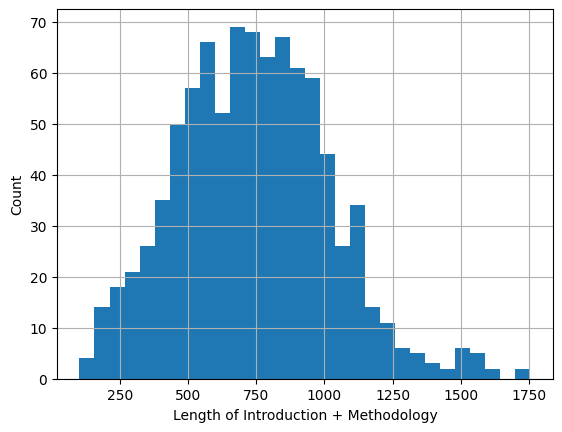

In [114]:
(new_df["Introduction"].map(len) + new_df["Methodology"].map(len)).hist(bins=30)
plt.xlabel("Length of Introduction + Methodology")
plt.ylabel("Count")
plt.show()

In [115]:
for col in new_df.columns:
    print(col, len(new_df[new_df[col].apply(lambda x: len(x)) > 0]))


Research Question 890
Introduction 890
Methodology 890


In [117]:
test_df = new_df.sample(190, random_state=42)
train_df = new_df[~new_df.index.isin(test_df.index)]

In [118]:
train_df.to_json("pqal_train.jsonl", orient="records", lines=True, force_ascii=False)
test_df.to_json("pqal_test.jsonl", orient="records", lines=True, force_ascii=False)

In [1]:
from huggingface_hub import notebook_login
notebook_login()

In [2]:
from transformers import pipeline
import torch

In [ ]:

pipe = pipeline("text-generation", model="google/gemma-3-1b-it", device="cuda", torch_dtype=torch.bfloat16)

model.safetensors:   0%|          | 0.00/2.00G [00:00<?, ?B/s]

C:\Users\SINJOY\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\SINJOY\.cache\huggingface\hub\models--google--gemma-3-1b-it. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


generation_config.json:   0%|          | 0.00/215 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

Device set to use cuda


In [4]:
messages = [
    [
        {
            "role": "system",
            "content": [{"type": "text", "text": "You are a helpful assistant."},]
        },
        {
            "role": "user",
            "content": [{"type": "text", "text": "Write a poem on Hugging Face, the company"},]
        },
    ],
]

In [5]:
output = pipe(messages, max_new_tokens=50)

In [14]:
print(output[0][0]["generated_text"][-1]["content"])

Okay, here’s a poem about Hugging Face, aiming for a balance of appreciation and a touch of the company’s spirit:

**The Neural Web**

A whisper of code, a digital dream,
Hugging Face arises,


In [36]:
data_sample = df.sample(1).iloc[0]
print(data_sample)
prompt = get_prompt(data_sample)
print(prompt)

QUESTION                   Should pulp chamber pulpotomy be seen as a per...
CONTEXTS                   [Seventeen patients, aged 7-54 years (mean of ...
LABELS                                                [METHODOLOGY, RESULTS]
MESHES                     [Adolescent, Adult, Aluminum Compounds, Bicusp...
YEAR                                                                    2013
reasoning_required_pred                                                  yes
reasoning_free_pred                                                       no
final_decision                                                            no
LONG_ANSWER                Under the conditions of this study, pulpotomy ...
cluster                                               [Methodology, Results]
Name: 22900881, dtype: object
<|begin_of_text|><|start_header_id|>system<|end_header_id|>

You are a helpful assistant<|eot_id|><|start_header_id|>user<|end_header_id|>

***Insert Instruction Here***

RESEARCH QUESTION: Should pul

In [5]:
with open("pqal_train_chat.jsonl", "w") as wf:
    with open("pqal_train.jsonl") as f:
        for data in f:
            ex = json.loads(data)
            towrite = get_llama_messages_prompt_resp(ex["Research Question"], ex["Introduction"], ex["Methodology"])
            wf.write(json.dumps(towrite) + "\n")

## Results

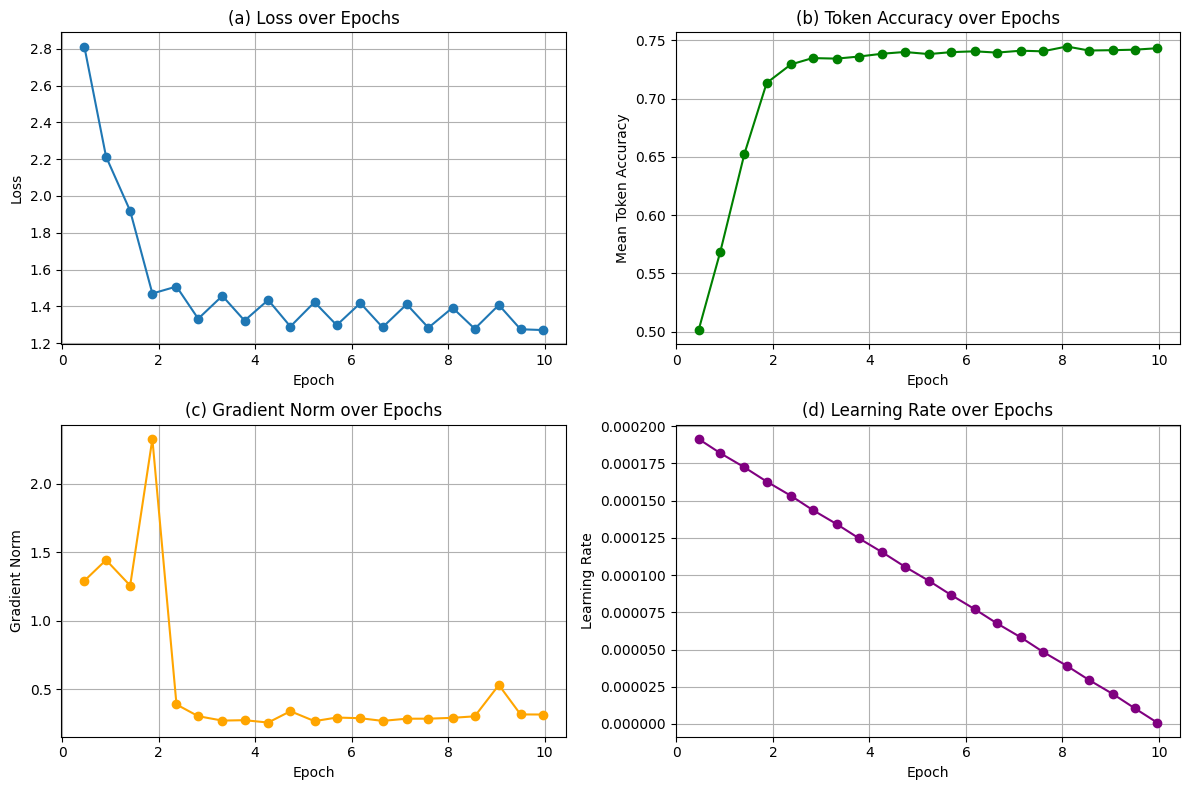

In [ ]:
import matplotlib.pyplot as plt

# Data from terminal logs
logs = [
    {'loss': 2.8122, 'grad_norm': 1.290883183479309, 'learning_rate': 0.00019142857142857145, 'num_tokens': 105631.0, 'mean_token_accuracy': 0.5012702468782664, 'epoch': 0.46},                                             
    {'loss': 2.2137, 'grad_norm': 1.4430044889450073, 'learning_rate': 0.00018190476190476192, 'num_tokens': 210874.0, 'mean_token_accuracy': 0.5686435841023922, 'epoch': 0.91},                                              
    {'loss': 1.9187, 'grad_norm': 1.2562750577926636, 'learning_rate': 0.0001723809523809524, 'num_tokens': 321077.0, 'mean_token_accuracy': 0.652787182302702, 'epoch': 1.41},                                                
    {'loss': 1.4698, 'grad_norm': 2.327138900756836, 'learning_rate': 0.00016285714285714287, 'num_tokens': 425862.0, 'mean_token_accuracy': 0.713435447961092, 'epoch': 1.87},                                                
    {'loss': 1.5078, 'grad_norm': 0.38726821541786194, 'learning_rate': 0.00015333333333333334, 'num_tokens': 535491.0, 'mean_token_accuracy': 0.7293105260247276, 'epoch': 2.37},                                             
    {'loss': 1.3328, 'grad_norm': 0.30177193880081177, 'learning_rate': 0.0001438095238095238, 'num_tokens': 640243.0, 'mean_token_accuracy': 0.7347987793385983, 'epoch': 2.82},                                              
    {'loss': 1.4571, 'grad_norm': 0.2696424722671509, 'learning_rate': 0.00013428571428571428, 'num_tokens': 753175.0, 'mean_token_accuracy': 0.7343393280392602, 'epoch': 3.32},                                              
    {'loss': 1.3225, 'grad_norm': 0.27261534333229065, 'learning_rate': 0.00012476190476190478, 'num_tokens': 859155.0, 'mean_token_accuracy': 0.7361113779246807, 'epoch': 3.78},                                             
    {'loss': 1.4347, 'grad_norm': 0.25535380840301514, 'learning_rate': 0.00011523809523809524, 'num_tokens': 967675.0, 'mean_token_accuracy': 0.7385655435777846, 'epoch': 4.27},                                             
    {'loss': 1.2905, 'grad_norm': 0.33820033073425293, 'learning_rate': 0.00010571428571428572, 'num_tokens': 1072510.0, 'mean_token_accuracy': 0.7400341585278511, 'epoch': 4.73},                                            
    {'loss': 1.4228, 'grad_norm': 0.26565882563591003, 'learning_rate': 9.61904761904762e-05, 'num_tokens': 1184730.0, 'mean_token_accuracy': 0.7382439176241556, 'epoch': 5.23},                                              
    {'loss': 1.2977, 'grad_norm': 0.2919202148914337, 'learning_rate': 8.666666666666667e-05, 'num_tokens': 1289110.0, 'mean_token_accuracy': 0.7398899778723717, 'epoch': 5.69},                                              
    {'loss': 1.4178, 'grad_norm': 0.28696271777153015, 'learning_rate': 7.714285714285715e-05, 'num_tokens': 1399176.0, 'mean_token_accuracy': 0.7406200567881266, 'epoch': 6.18},                                             
    {'loss': 1.2861, 'grad_norm': 0.26745885610580444, 'learning_rate': 6.761904761904763e-05, 'num_tokens': 1505068.0, 'mean_token_accuracy': 0.7395052723586559, 'epoch': 6.64},                                             
    {'loss': 1.4113, 'grad_norm': 0.28345435857772827, 'learning_rate': 5.8095238095238104e-05, 'num_tokens': 1616365.0, 'mean_token_accuracy': 0.7411409616470337, 'epoch': 7.14},                                            
    {'loss': 1.2838, 'grad_norm': 0.28355345129966736, 'learning_rate': 4.8571428571428576e-05, 'num_tokens': 1720382.0, 'mean_token_accuracy': 0.7405927091836929, 'epoch': 7.59},                                            
    {'loss': 1.3927, 'grad_norm': 0.2898051142692566, 'learning_rate': 3.904761904761905e-05, 'num_tokens': 1830867.0, 'mean_token_accuracy': 0.7447373405808494, 'epoch': 8.09},                                              
    {'loss': 1.2782, 'grad_norm': 0.300830602645874, 'learning_rate': 2.9523809523809526e-05, 'num_tokens': 1936345.0, 'mean_token_accuracy': 0.7413004696369171, 'epoch': 8.55},                                              
    {'loss': 1.4076, 'grad_norm': 0.5297861099243164, 'learning_rate': 2e-05, 'num_tokens': 2046923.0, 'mean_token_accuracy': 0.7416016572997683, 'epoch': 9.05},                                                              
    {'loss': 1.2755, 'grad_norm': 0.31467893719673157, 'learning_rate': 1.0476190476190477e-05, 'num_tokens': 2152338.0, 'mean_token_accuracy': 0.7420232474803925, 'epoch': 9.5},                                             
    {'loss': 1.2713, 'grad_norm': 0.314011812210083, 'learning_rate': 9.523809523809526e-07, 'num_tokens': 2256967.0, 'mean_token_accuracy': 0.7432530015707016, 'epoch': 9.96},                                               
    # {'train_runtime': 397.9175, 'train_samples_per_second': 17.592, 'train_steps_per_second': 0.528, 'train_loss': 1.500223091670445, 'epoch': 9.96}  
]

# Extract metrics for plotting
epochs = [log['epoch'] for log in logs]
loss = [log['loss'] for log in logs]
accuracy = [log['mean_token_accuracy'] for log in logs]
grad_norm = [log['grad_norm'] for log in logs]
lr = [log['learning_rate'] for log in logs]

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(epochs, loss, marker='o', label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('(a) Loss over Epochs')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(epochs, accuracy, marker='o', label='Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Mean Token Accuracy')
plt.title('(b) Token Accuracy over Epochs')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(epochs, grad_norm, marker='o', label='Grad Norm', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Gradient Norm')
plt.title('(c) Gradient Norm over Epochs')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(epochs, lr, marker='o', label='Learning Rate', color='purple')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('(d) Learning Rate over Epochs')
plt.grid(True)

plt.tight_layout()
plt.show()``


### Analysis on Results

In [4]:
import pandas as pd
import json

In [5]:
preds_pt = []
preds_ft = []

test_df = pd.read_json("pqal_test.jsonl", lines=True).head(12)
test_df["expected"] = "Introduction: " + test_df["Introduction"] + "\n" + "Methodology: " + test_df["Methodology"]

with open("predictions_from_pretrained.jsonl") as f:
    for line in f:
        ex = json.loads(line)
        preds_pt.append(ex)
test_df["pred_pt"] = preds_pt

with open("predictions_from_finetuned.jsonl") as f:
    for line in f:
        ex = json.loads(line)
        preds_ft.append(ex)
test_df["pred_ft"] = preds_ft
        

In [6]:
test_df["pred_pt_intro"] = test_df["pred_pt"].apply(lambda x: x.split("Introduction:")[1].split("Methodology:")[0].strip())
test_df["pred_pt_method"] = test_df["pred_pt"].apply(lambda x: x.split("Methodology:")[1].strip())
test_df["pred_ft_intro"] = test_df["pred_ft"].apply(lambda x: x.split("Introduction:")[1].split("Methodology:")[0].strip())
test_df["pred_ft_method"] = test_df["pred_ft"].apply(lambda x: x.split("Methodology:")[1].strip())
test_df

,Research Question,Introduction,Methodology,expected,pred_pt,pred_ft,pred_pt_intro,pred_pt_method,pred_ft_intro,pred_ft_method
0,Preoperative locoregional staging of gastric c...,The aim of this study was to prospectively com...,This study had Institutional Review Board appr...,Introduction: The aim of this study was to pro...,Introduction:\nTo determine if the use of magn...,Introduction:\nThe preoperative locoregional s...,To determine if the use of magnetic resonance ...,A retrospective study of patients with gastric...,The preoperative locoregional staging of gastr...,This study will involve a retrospective review...
1,Is CA72-4 a useful biomarker in differential d...,Surgical excision of ovarian endometriomas in ...,Serums CA125 and CA72-4 were measured in 72 pa...,Introduction: Surgical excision of ovarian end...,Introduction:\nTo determine whether CA72-4 is ...,Introduction:\nThe research question of whethe...,To determine whether CA72-4 is a useful biomar...,CA72-4 is a tumor marker that is used to diffe...,The research question of whether CA72-4 is a u...,The study would involve a combination of case-...
2,Transgastric endoscopic splenectomy: is it pos...,We have previously reported the feasibility of...,We performed acute experiments on 50-kg pigs. ...,Introduction: We have previously reported the ...,Introduction:\nTo determine if transgastric en...,Introduction:\nThe concept of transgastric end...,To determine if transgastric endoscopic splene...,Transgastric endoscopic splenectomy is a proce...,The concept of transgastric endoscopic splenec...,"This study will be a prospective, single-cente..."
3,Is routine chest radiography after transbronch...,Pneumothorax following flexible bronchoscopy (...,The study group included 350 consecutive patie...,Introduction: Pneumothorax following flexible ...,Introduction:\nThe purpose of this study was t...,Introduction:\nThis study aims to investigate ...,The purpose of this study was to determine whe...,Transbronchial biopsy (TB) was performed on 30...,This study aims to investigate whether routine...,The study will involve a systematic review of ...
4,Are there effects of intrauterine cocaine expo...,To ascertain whether level of intrauterine coc...,Ninety-three early adolescents (12.5-14.5 year...,Introduction: To ascertain whether level of in...,Introduction:\nThe question of whether intraut...,Introduction:\nThis study aims to investigate ...,The question of whether intrauterine cocaine e...,A retrospective review of the ICGE records of ...,This study aims to investigate the potential e...,A prospective cohort study would be conducted ...
5,Is atropine needed with ketamine sedation?,To compare atropine with placebo as an adjunct...,Children aged between 1 and 16 years of age re...,Introduction: To compare atropine with placebo...,Introduction:\nTo investigate whether atropine...,Introduction:\nThe use of ketamine for sedatio...,To investigate whether atropine is needed with...,This study compared the efficacy of atropine (...,The use of ketamine for sedation has been a to...,This study will employ a randomized controlled...
6,Can EMS Providers Provide Appropriate Tidal Vo...,"In the prehospital setting, Emergency Medical ...",Using a patient simulator of a head and thorax...,"Introduction: In the prehospital setting, Emer...",Introduction:\nTo determine whether an EMS pro...,Introduction:\nThe primary objective of this s...,To determine whether an EMS provider could pro...,The research involved simulating a scenario wh...,The primary objective of this study is to inve...,The study will employ a mixed-methods approach...
7,Does case-mix based reimbursement stimulate th...,Reimbursement based on the total care of a pat...,Data for this study were gathered during the w...,Introduction: Reimbursement based on the total...,Introduction:\nThe case-mix model is widely us...,Introduction:\nThe primary goal of this resear...,The case-mix model is widely used to analyze h...,This stu

In [7]:
test_df.to_csv("pqal_test_with_predictions_12.csv", index=False)

### Section-wise Scores

In [ ]:
import evaluate
import numpy as np

def get_metrics(predictions, references):
    bleu = evaluate.load("bleu")
    rouge = evaluate.load("rouge")
    f1 = evaluate.load("f1")
    bert_score_eval = evaluate.load("bertscore")
    # Compute metrics
    bleu_score = bleu.compute(
        predictions=predictions, references=references  # [[ref] for ref in references]
    )
    rouge_score = rouge.compute(predictions=predictions, references=references)
    # f1_score = f1.compute(predictions=predictions, references=references)
    bert_score = bert_score_eval.compute(
        predictions=predictions, references=references, model_type="bert-base-uncased"
    )

    return {
        "Contains Section (%)": np.mean([len(x) > 0 for x in references]) * 100,
        "BLEU": bleu_score["bleu"],
        "ROUGE-L": rouge_score["rougeL"],
        "Precision": np.mean(bert_score["precision"]),
        "Recall": np.mean(bert_score["recall"]),
        "BERT Score": np.mean(bert_score["f1"]),
    }


pt_res = {}
ft_res = {}

# print("*** Pretrained Model ***")
# print("Contains Introduction:", test_df["pred_pt_intro"].map(lambda x: len(x) > 0).mean())

pt_res["Overall"] = get_metrics(test_df["pred_pt"].tolist(), test_df["expected"].tolist())
pt_res["Introduction"] = get_metrics(test_df["pred_pt_intro"].tolist(), test_df["Introduction"].tolist())
pt_res["Methodology"] = get_metrics(test_df["pred_pt_method"].tolist(), test_df["Methodology"].tolist())

# print("*** Finetuned Model ***")
ft_res["Overall"] = get_metrics(test_df["pred_ft"].tolist(), test_df["expected"].tolist())
ft_res["Introduction"] = get_metrics(test_df["pred_ft_intro"].tolist(), test_df["Introduction"].tolist()) 
ft_res["Methodology"] = get_metrics(test_df["pred_ft_method"].tolist(), test_df["Methodology"].tolist())

In [33]:
print("*** Pretrained Model ***")
# print in a latex table format
print("\\begin{table}[h]")
print("\\centering")
print("\\begin{tabular}{|c|c|c|c|}")
print("\\hline")
print("\\textbf{Metric} & \\textbf{BLEU} & \\textbf{ROUGE-L} & \\textbf{BERT Score} \\\\")
print("\\hline")
print("\\hline")
for k, v in pt_res.items():
    print(f"{k} & {v['BLEU']:.4f} & {v['ROUGE-L']:.4f} & {v['BERT Score']:.4f} \\\\")
    print("\\hline")
print("\\end{tabular}")
print("\\caption{Evaluation results for the pretrained model.}")
print("\\label{tab:pretrained_results}")
print("\\end{table}")


*** Pretrained Model ***
\begin{table}[h]
\centering
\begin{tabular}{|c|c|c|c|}
\hline
\textbf{Metric} & \textbf{BLEU} & \textbf{ROUGE-L} & \textbf{BERT Score} \\
\hline
\hline
Overall & 0.0703 & 0.1961 & 0.5959 \\
\hline
Introduction & 0.0641 & 0.2370 & 0.6209 \\
\hline
Methodology & 0.0145 & 0.1483 & 0.5281 \\
\hline
\end{tabular}
\caption{Evaluation results for the pretrained model.}
\label{tab:pretrained_results}
\end{table}


In [29]:
print("*** Pretrained Model ***")
pd.DataFrame(pt_res).T

*** Pretrained Model ***


,Contains Section,BLEU,ROUGE-L,Precision,Recall,BERT Score
Overall,100.0,0.070269,0.196095,0.619896,0.577214,0.595939
Introduction,100.0,0.064141,0.236973,0.693944,0.568240,0.620858
Methodology,100.0,0.014529,0.148293,0.529673,0.529823,0.528119


In [30]:
print("*** Finetuned Model ***")
pd.DataFrame(ft_res).T

*** Finetuned Model ***


,Contains Section,BLEU,ROUGE-L,Precision,Recall,BERT Score
Overall,100.0,0.057719,0.180519,0.611808,0.603309,0.606860
Introduction,100.0,0.075930,0.205692,0.611337,0.604690,0.607501
Methodology,100.0,0.000000,0.127996,0.533371,0.556584,0.542677
